<a href="https://colab.research.google.com/github/AeroFrankGonzalez/Coderhouse_project/blob/main/SandboxCoderhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Proyecto Coderhouse`
> 
**Frank Gonzalez**
>
Data Science

In [ ]:
#Librerias
import pandas as pd # para trabajar con datos en formato tabla
import numpy as np # para operaciones matemáticas
import matplotlib.pyplot as plt # para visualizar datos
import seaborn as sns # para visualizar datos
from sklearn.model_selection import train_test_split # para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler # para estandarizar los datos
from sklearn.linear_model import LogisticRegression # para entrenar un modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier # para entrenar un modelo de árbol de decisión
from sklearn.ensemble import RandomForestClassifier # para entrenar un modelo de bosque aleatorio
from sklearn.metrics import accuracy_score, confusion_matrix # para evaluar el rendimiento del modelo


#En general, el proceso típico en un proyecto de data science implica las siguientes etapas:

`Análisis exploratorio de datos`: En esta etapa, se realizan gráficos y estadísticas para entender la distribución de los datos, identificar valores faltantes o atípicos, y explorar la relación entre diferentes variables.

`Preprocesamiento de datos`: En esta etapa, se preparan los datos para el análisis. Esto puede incluir la limpieza de datos, el manejo de valores faltantes o atípicos, la normalización de los datos, y la selección de variables.

`Modelado`: En esta etapa, se construyen modelos estadísticos o de aprendizaje automático para predecir o explicar los datos. Esto puede incluir la selección de algoritmos, la validación del modelo y la optimización de los parámetros.

`Evaluación`: En esta etapa, se evalúa la calidad del modelo y se compara con otros modelos.

`Interpretación`: En esta etapa, se interpreta el modelo y se utilizan los resultados para responder las preguntas específicas que se plantearon al inicio del proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#ruta al archivo customer_data.csv
path_customer_data = '/content/drive/MyDrive/DataScienceCoderhouse/customer_data.csv'

#ruta al archivo payment_data.csv
path_payment_data = '/content/drive/MyDrive/DataScienceCoderhouse/payment_data.csv'

#carga de los archivos CSV
customer_data = pd.read_csv(path_customer_data)
payment_data = pd.read_csv(path_payment_data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# customer_data

# Visualizar los primeros 5 registros del dataframe customer_data
print("Primeros 5 registros del dataframe customer_data:")
print(customer_data.head())

# Imprimir los tipos de datos de cada columna en el dataframe customer_data
print("Tipos de datos del dataframe customer_data:")
print(customer_data.dtypes)

Primeros 5 registros del dataframe customer_data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141  
Tipos de datos del dataframe customer_data:
label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    f

In [ ]:
# payment_data

# Convertir las columnas 'update_date' y 'report_date' a objetos datetime
payment_data['update_date'] = pd.to_datetime(payment_data['update_date'], format='%d/%m/%Y')
payment_data['report_date'] = pd.to_datetime(payment_data['report_date'], format='%d/%m/%Y')

# Convertir las fechas al formato deseado 'aaaa-mm-dd'
payment_data['update_date'] = payment_data['update_date'].dt.strftime('%Y-%m-%d')
payment_data['report_date'] = payment_data['report_date'].dt.strftime('%Y-%m-%d')

# Visualizar los primeros 5 registros del dataframe payment_data
print("Primeros 5 registros del dataframe payment_data:")
print(payment_data.head())

# Imprimir los tipos de datos de cada columna en el dataframe payment_data
print("Tipos de datos del dataframe payment_data:")
print(payment_data.dtypes)

Primeros 5 registros del dataframe payment_data:
         id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   prod_limit update_date  new_balance  highest_balance report_date  
0     16500.0  2016-12-04          0.0              NaN         NaN  
1         NaN  2016-12-04     588720.0         491100.0         NaN  
2         NaN  2016-12-04     840000.0         700500.0  2016-04-22  
3     37400.0  2016-12-03       8425.2           7520.0  2016-04-25  
4         NaN  2016-12-03      15147.6              NaN  2016-04-26  
Tipos de datos del dataframe payment_data:
id                   int64
OVD_t1               int64
OVD_t2 

In [ ]:
#dataframe final
merged_data = pd.merge(customer_data, payment_data, on='id')

# Visualizar los primeros 5 registros del dataframe merged_data
print("Primeros 5 registros del dataframe merged_data:")
print(merged_data.head())

# Imprimir los tipos de datos de cada columna en el dataframe merged_data
# print("Tipos de datos del dataframe merged_data:")
# print(merged_data.dtypes)

Primeros 5 registros del dataframe merged_data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      1  54982665      5  1245.5      3   77000.0      2     15      5   
2      1  54982665      5  1245.5      3   77000.0      2     15      5   
3      1  54982665      5  1245.5      3   77000.0      2     15      5   
4      0  59004779      4  1277.0      1  113000.0      2      8     -1   

   fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0    109  ...       0       0        0           9         10     60500.0   
1    109  ...       0       0        0          18         10         NaN   
2    109  ...       0       0        0           1          5         NaN   
3    109  ...       2      26    11906           6         10         NaN   
4    100  ...       0       0        0           4          6         NaN   

   update_date  new_balance  highest_b

In [ ]:
print(merged_data.head())

   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      1  54982665      5  1245.5      3   77000.0      2     15      5   
2      1  54982665      5  1245.5      3   77000.0      2     15      5   
3      1  54982665      5  1245.5      3   77000.0      2     15      5   
4      0  59004779      4  1277.0      1  113000.0      2      8     -1   

   fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0    109  ...       0       0        0           9         10     60500.0   
1    109  ...       0       0        0          18         10         NaN   
2    109  ...       0       0        0           1          5         NaN   
3    109  ...       2      26    11906           6         10         NaN   
4    100  ...       0       0        0           4          6         NaN   

   update_date  new_balance  highest_balance  report_date  
0   2015-01-31       6657.

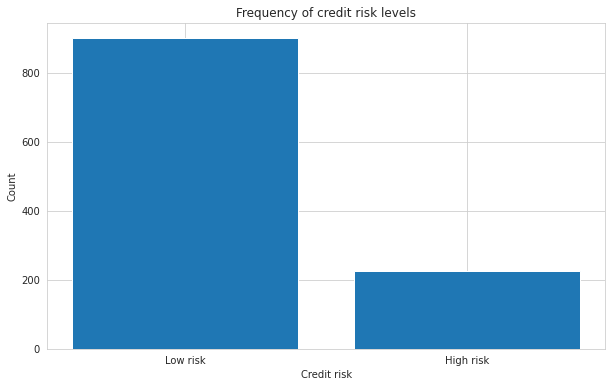

In [ ]:
#borrador
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#contar la frecuencia de los valores de la columna label
label_counts = customer_data['label'].value_counts()

#crear el gráfico de barras
plt.bar(label_counts.index, label_counts.values)

#etiquetas y títulos
plt.xlabel('Credit risk')
plt.ylabel('Count')
plt.title('Frequency of credit risk levels')
plt.xticks([0,1], ['Low risk', 'High risk'])

plt.show()


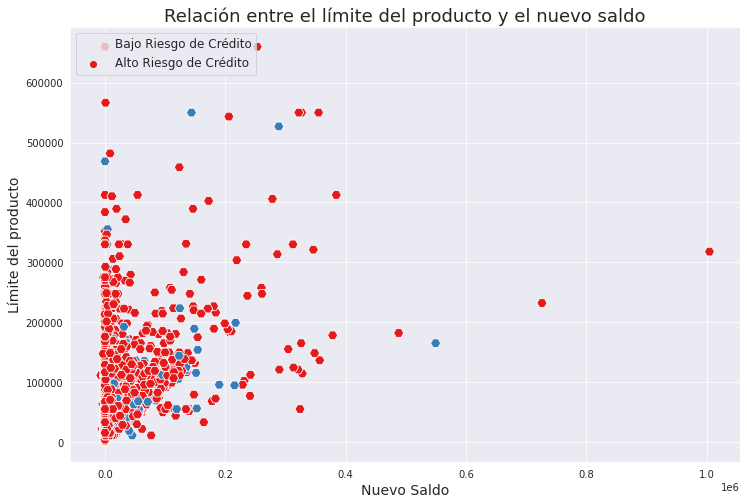

In [ ]:
#DataFrame para el gráfico
merged_data = pd.merge(customer_data, payment_data, on='id')

#estilo
sns.set_style("darkgrid")

#el gráfico
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='new_balance', y='prod_limit', data=merged_data, hue='label', style='prod_code', s=100, ax=ax, palette='Set1')

#título y etiquetas de los ejes
ax.set_title('Relación entre el límite del producto y el nuevo saldo', fontsize=18)
ax.set_xlabel('Nuevo Saldo', fontsize=14)
ax.set_ylabel('Límite del producto', fontsize=14)

#leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Bajo Riesgo de Crédito', 'Alto Riesgo de Crédito'], loc='upper left', fontsize=12)

plt.show()


Text(0.5, 1.0, 'Distribución de variables numéricas')

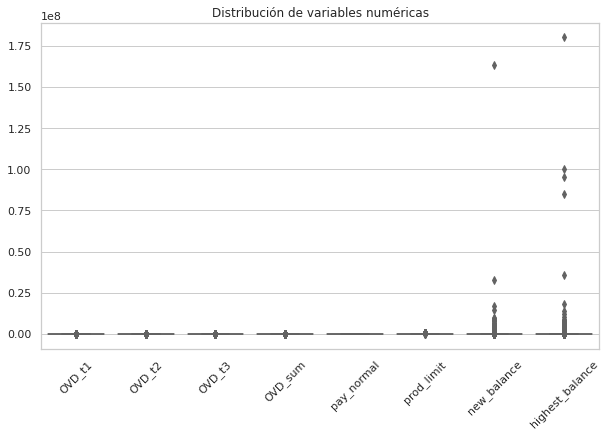

In [ ]:
#borrador
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#las columnas numéricas del dataframe
numeric_cols = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_limit', 'new_balance', 'highest_balance']

#boxplot con Seaborn
sns.boxplot(data=merged_data[numeric_cols], palette='Set3')

#los ejes y el título del gráfico
plt.xticks(rotation=45)
plt.title('Distribución de variables numéricas')

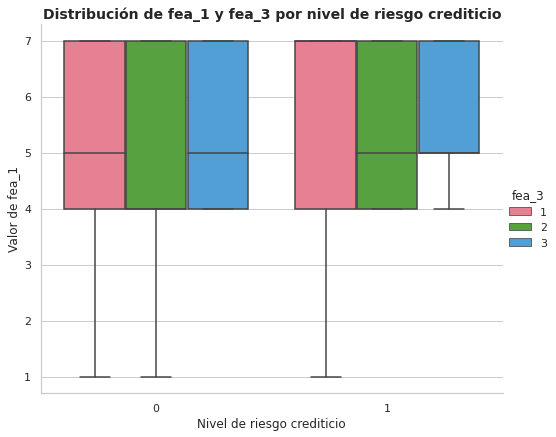

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#gráfico de cajones con los datos de fea_1 y fea_3, segmentados por label
sns.catplot(x="label", y="fea_1", hue="fea_3", kind="box", data=merged_data, 
            palette="husl", dodge=True, height=6, aspect=1.2)

#estilo
plt.title("Distribución de fea_1 y fea_3 por nivel de riesgo crediticio", fontsize=14, fontweight='bold')
plt.xlabel("Nivel de riesgo crediticio", fontsize=12)
plt.ylabel("Valor de fea_1", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

#el gráfico
plt.show()

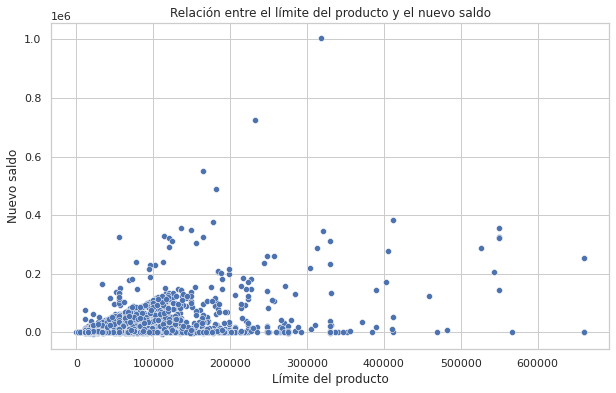

In [ ]:
#borrador
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='prod_limit', y='new_balance', data=merged_data)

plt.title('Relación entre el límite del producto y el nuevo saldo')
plt.xlabel('Límite del producto')
plt.ylabel('Nuevo saldo')
plt.show()

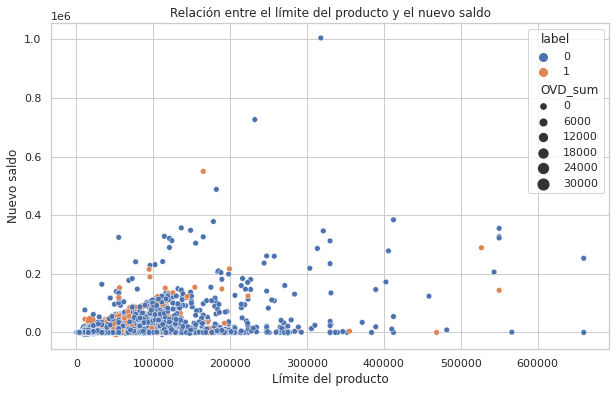

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#grilla
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#el gráfico de dispersión
sns.scatterplot(x="prod_limit", y="new_balance", hue="label", size="OVD_sum", data=merged_data)

#el tamaño de los puntos
plt.rcParams['lines.markersize'] = 8


plt.title('Relación entre el límite del producto y el nuevo saldo')
plt.xlabel('Límite del producto')
plt.ylabel('Nuevo saldo')
plt.show()

In [ ]:
# Preparación de los datos
# Eliminación de valores faltantes
merged_data.dropna(inplace=True)

# Codificación de variables categóricas
merged_data = pd.get_dummies(merged_data, columns=['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9'])

# Selección de características
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code', 'prod_limit', 'new_balance', 'highest_balance', 'fea_2', 'fea_4', 'fea_8', 'fea_10', 'fea_11']

X = merged_data[features]
y = merged_data['label']


In [ ]:
ds_final_data = merged_data.drop(['report_date', 'update_date'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(ds_final_data.drop(['label'], axis=1), 
                                                    ds_final_data['label'], 
                                                    test_size=0.3, 
                                                    random_state=42)

#crear el modelo de Regresión Logística
model = LogisticRegression(random_state=42)

#entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

#predecir las etiquetas de clase para el conjunto de prueba
y_pred = model.predict(X_test)

#precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}%".format(accuracy*100))


Precisión del modelo: 89.41%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#separarlo los datos en conjuntos de entrenamiento y prueba
X = ds_final_data.drop('label', axis=1)
y = ds_final_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#seleccionar un modelo y entrenarlo
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))


Precisión del modelo: 89.41%


# Data Acquisition II

In [ ]:
#request API World Bank Data

import requests
import pandas as pd

#parametros
url = "http://api.worldbank.org/v2/country/"
indicator = "SP.POP.TOTL" # indicador de población
countries = ["AR", "BR", "CL", "CO", "MX", "PE"] # países de interés

#data request
data = []
for country in countries:
    r = requests.get(url + country + "/indicator/" + indicator, params={"format": "json"})
    if r.status_code == 200:
        json_data = r.json()
        for entry in json_data[1]:
            if entry["value"] is not None:
                data.append({"country": entry["countryiso3code"], "year": entry["date"], "population": entry["value"]})

#dataframe
populations = pd.DataFrame(data)

print(populations.head())


  country  year  population
0     ARG  2021    45808747
1     ARG  2020    45376763
2     ARG  2019    44938712
3     ARG  2018    44494502
4     ARG  2017    44044811


In [ ]:
#metodo resumido para hacer el request de la API de World Bank Data, por medio de la libreria wbdata

!pip uninstall wbdata
!pip install wbdata

import wbdata

#parametros
indicator = {"SP.POP.TOTL": "Population, total"} # indicador de población
countries = ["AR", "BR", "CL", "CO", "MX", "PE"] # países de interés

#request
populations = wbdata.get_dataframe(indicator, country=countries)

print(populations.head())


# Data Wrangling II

# Paso a paso

1. Validar que se importe la libreria Pandas
2. Llamar el dateframe merged_data
3. Quitar columnas que no se requieren
4. Quitar duplicados
5. Sustituir faltantes con promedios
6. Crear nueva columna con productos contratados
7. Renombrar columnas
8. Validar resultado

In [ ]:
#data Wrangling para el 'merged_data' 

df = merged_data

df = df.drop(['id', 'update_date', 'highest_balance'], axis=1)

df = df.drop_duplicates()

df['prod_limit'] = df['prod_limit'].fillna(df['prod_limit'].mean())

df['num_products'] = df.iloc[:, 8:15].sum(axis=1)

df = df.rename(columns={'fea_1': 'age', 'fea_2': 'income', 'fea_3': 'education', 'fea_4': 'loan_amount',
                        'fea_5': 'loan_duration', 'fea_6': 'credit_score', 'fea_7': 'household_size',
                        'fea_8': 'dependents', 'OVD_t1': 'overdue_1', 'OVD_t2': 'overdue_2',
                        'OVD_t3': 'overdue_3', 'OVD_sum': 'total_overdue', 'pay_normal': 'num_payments'})

print(df.head())

   label  age  income  education  loan_amount  loan_duration  credit_score  \
0      1    5  1245.5          3      77000.0              2            15   
1      1    5  1245.5          3      77000.0              2            15   
2      1    5  1245.5          3      77000.0              2            15   
3      1    5  1245.5          3      77000.0              2            15   
4      0    4  1277.0          1     113000.0              2             8   

   household_size  dependents  fea_9  ...  overdue_1  overdue_2  overdue_3  \
0               5         109      5  ...          0          0          0   
1               5         109      5  ...          0          0          0   
2               5         109      5  ...          0          0          0   
3               5         109      5  ...          0          2         26   
4              -1         100      3  ...          0          0          0   

   total_overdue  num_payments  prod_code    prod_limit  new_b

<Axes: >

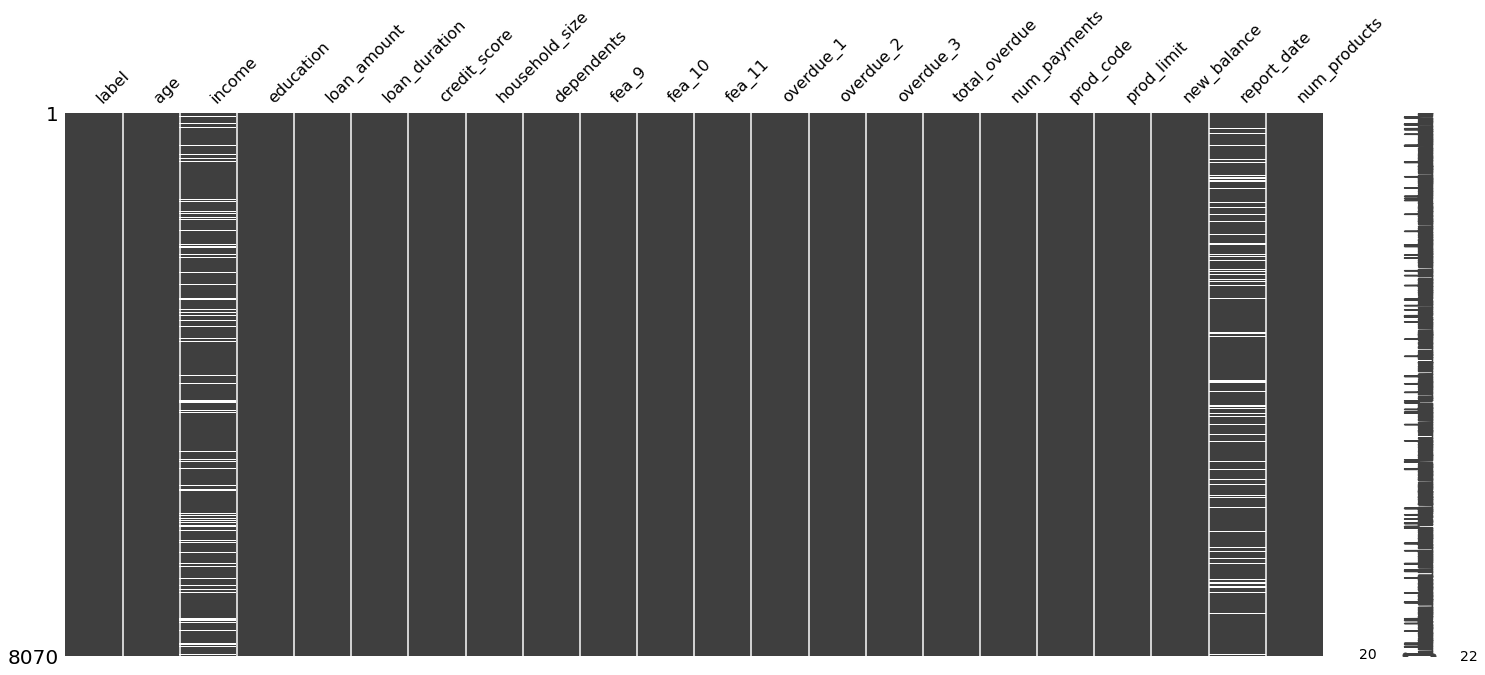

In [ ]:
import missingno as msno

df = merged_data

df = df.drop(['id', 'update_date', 'highest_balance'], axis=1)

df = df.drop_duplicates()

df['prod_limit'] = df['prod_limit'].fillna(df['prod_limit'].mean())

df['num_products'] = df.iloc[:, 8:15].sum(axis=1)

df = df.rename(columns={'fea_1': 'age', 'fea_2': 'income', 'fea_3': 'education', 'fea_4': 'loan_amount',
                        'fea_5': 'loan_duration', 'fea_6': 'credit_score', 'fea_7': 'household_size',
                        'fea_8': 'dependents', 'OVD_t1': 'overdue_1', 'OVD_t2': 'overdue_2',
                        'OVD_t3': 'overdue_3', 'OVD_sum': 'total_overdue', 'pay_normal': 'num_payments'})

msno.matrix(df)


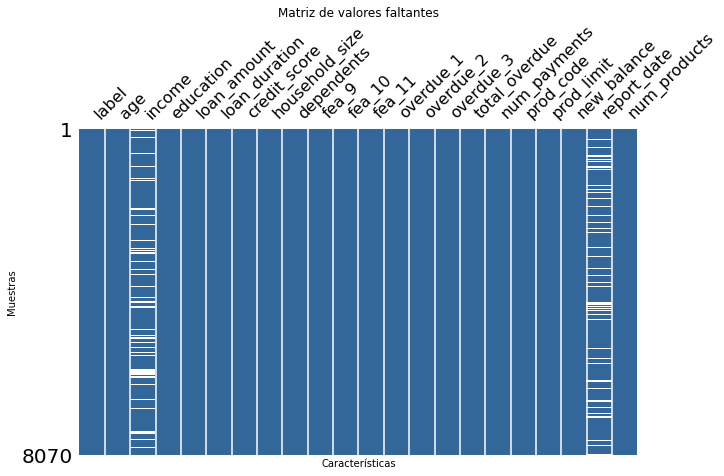

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

df = merged_data

df = df.drop(['id', 'update_date', 'highest_balance'], axis=1)

df = df.drop_duplicates()

df['prod_limit'] = df['prod_limit'].fillna(df['prod_limit'].mean())

df['num_products'] = df.iloc[:, 8:15].sum(axis=1)

df = df.rename(columns={'fea_1': 'age', 'fea_2': 'income', 'fea_3': 'education', 'fea_4': 'loan_amount',
                        'fea_5': 'loan_duration', 'fea_6': 'credit_score', 'fea_7': 'household_size',
                        'fea_8': 'dependents', 'OVD_t1': 'overdue_1', 'OVD_t2': 'overdue_2',
                        'OVD_t3': 'overdue_3', 'OVD_sum': 'total_overdue', 'pay_normal': 'num_payments'})

fig, ax = plt.subplots(figsize=(10, 6))
msno.matrix(df, ax=ax, sparkline=False, color=(0.2, 0.4, 0.6))
ax.set_title('Matriz de valores faltantes')
ax.set_xlabel('Características')
ax.set_ylabel('Muestras')
plt.show()
